## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [9]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.2, 0.4]
redice_lr_patient = [2, 4 ]

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12,
                                  monitor='val_loss',
                                  patience=reduce_patient,
                                  verbose=1) 
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.20, reduce_patient: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,773,066
Trainable params: 1,773,066
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, va

50000/50000 [==============================] - 4s 82us/step - loss: 1.6250 - acc: 0.4351 - val_loss: 1.6282 - val_acc: 0.4310
Epoch 18/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.6126 - acc: 0.4387 - val_loss: 1.6160 - val_acc: 0.4352
Epoch 19/25
50000/50000 [==============================] - 4s 75us/step - loss: 1.6002 - acc: 0.4429 - val_loss: 1.6062 - val_acc: 0.4396
Epoch 20/25
50000/50000 [==============================] - 4s 74us/step - loss: 1.5889 - acc: 0.4479 - val_loss: 1.5941 - val_acc: 0.4404
Epoch 21/25
50000/50000 [==============================] - 4s 75us/step - loss: 1.5774 - acc: 0.4516 - val_loss: 1.5843 - val_acc: 0.4429
Epoch 22/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.5666 - acc: 0.4557 - val_loss: 1.5735 - val_acc: 0.4474
Epoch 23/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.5560 - acc: 0.4593 - val_loss: 1.5648 - val_acc: 0.4501
Epoch 24/25
50000/50000 [=====================

50000/50000 [==============================] - 4s 85us/step - loss: 1.7262 - acc: 0.3962 - val_loss: 1.7157 - val_acc: 0.4004
Epoch 11/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.7082 - acc: 0.4007 - val_loss: 1.7012 - val_acc: 0.4029
Epoch 12/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.6913 - acc: 0.4083 - val_loss: 1.6864 - val_acc: 0.4079
Epoch 13/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.6762 - acc: 0.4126 - val_loss: 1.6702 - val_acc: 0.4116
Epoch 14/25
50000/50000 [==============================] - 4s 74us/step - loss: 1.6619 - acc: 0.4173 - val_loss: 1.6563 - val_acc: 0.4182
Epoch 15/25
50000/50000 [==============================] - 4s 75us/step - loss: 1.6480 - acc: 0.4230 - val_loss: 1.6467 - val_acc: 0.4247
Epoch 16/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.6347 - acc: 0.4272 - val_loss: 1.6329 - val_acc: 0.4286
Epoch 17/25
50000/50000 [=====================

Epoch 3/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.7214 - acc: 0.3865 - val_loss: 1.6804 - val_acc: 0.4086
Epoch 4/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.6596 - acc: 0.4116 - val_loss: 1.6355 - val_acc: 0.4221
Epoch 5/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.6236 - acc: 0.4259 - val_loss: 1.6027 - val_acc: 0.4398
Epoch 6/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.5845 - acc: 0.4409 - val_loss: 1.5792 - val_acc: 0.4442
Epoch 7/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.5603 - acc: 0.4488 - val_loss: 1.5611 - val_acc: 0.4473
Epoch 8/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.5374 - acc: 0.4584 - val_loss: 1.5325 - val_acc: 0.4583
Epoch 9/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.5158 - acc: 0.4653 - val_loss: 1.5191 - val_acc: 0.4624
Epoch 10/25
50000/50000 [================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.9696 - acc: 0.2851 - val_loss: 1.7961 - val_acc: 0.3700
Epoch 2/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.7514 - acc: 0.3804 - val_loss: 1.7056 - val_acc: 0.3969
Epoch 3/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.6826 - acc: 0.4046 - val_loss: 1.6567 - val_acc: 0.4152
Epoch 4/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.6281 - acc: 0.4287 - val_loss: 1.6175 - val_acc: 0.4331
Epoch 5/25
50000/50000 [==============================] - 5s 90us/step - loss: 1.5915 - acc: 0.4410 - val_loss: 1.5888 - val_acc: 0.4419
Epoch 6/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.5635 - acc: 0.4497 - val_loss: 1.5630 - val_acc: 0.4489
Epoch 7/25
50000/50000 [==============================] - 5s 93us/step - loss: 1.5374 - acc: 0.4608 - val_loss: 1.5513 - val_acc

Numbers of exp: 9, reduce_factor: 0.20, reduce_patient: 4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,773,066
Trainable params: 1,773,066
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [

50000/50000 [==============================] - 5s 90us/step - loss: 1.5698 - acc: 0.4513 - val_loss: 1.5885 - val_acc: 0.4432
Epoch 20/25
50000/50000 [==============================] - 5s 90us/step - loss: 1.5627 - acc: 0.4511 - val_loss: 1.5710 - val_acc: 0.4502
Epoch 21/25
50000/50000 [==============================] - 5s 93us/step - loss: 1.5527 - acc: 0.4561 - val_loss: 1.5666 - val_acc: 0.4527
Epoch 22/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.5469 - acc: 0.4606 - val_loss: 1.5586 - val_acc: 0.4540
Epoch 23/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.5402 - acc: 0.4618 - val_loss: 1.5520 - val_acc: 0.4589
Epoch 24/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.5334 - acc: 0.4634 - val_loss: 1.5478 - val_acc: 0.4539
Epoch 25/25
50000/50000 [==============================] - 5s 92us/step - loss: 1.5258 - acc: 0.4655 - val_loss: 1.5374 - val_acc: 0.4505
Numbers of exp: 11, reduce_factor: 0.40, reduc

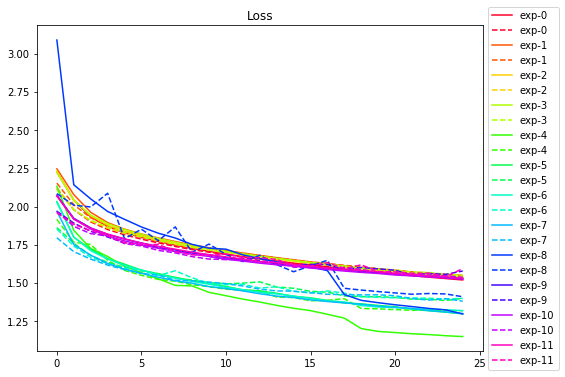

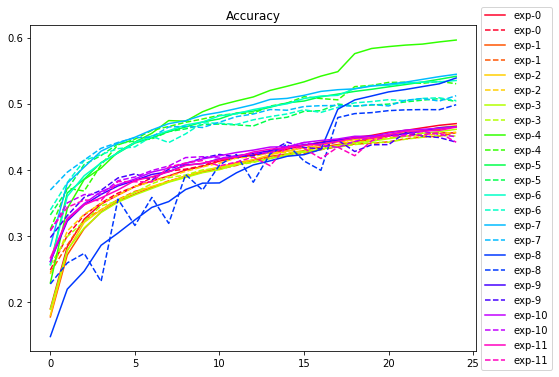

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()